In [1]:
import pandas as pd
from pathlib import Path
# import matplotlib_venn
import scanpy as sc
import stlearn as st
import anndata as ad
import seaborn as sns
import pickle
from matplotlib import pyplot as plt

In [2]:
# Wiener
BASE_PATH = Path("/scratch/imb/Xiao/")

In [ ]:
# Bunya
BASE_PATH = Path("/scratch/project_mnt/S0010/Xiao")

In [10]:
DATA_PATH = BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_LOOCV_skin_cancer_selected_gene"
OUT_PATH = DATA_PATH / "PLOT"
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [11]:
df = pd.DataFrame()
for file in (DATA_PATH).rglob("stimage*.csv"):
    df = pd.concat([df, pd.read_csv(file, index_col=0)], axis=0)

In [12]:
df

,Gene,Pearson correlation,Slide,Method
0,ISG15,-0.092837,Visium36_C1,STimage
1,TNFRSF18,-0.030779,Visium36_C1,STimage
2,TNFRSF4,-0.048445,Visium36_C1,STimage
3,CALML6,0.047394,Visium36_C1,STimage
4,HES5,-0.045672,Visium36_C1,STimage
...,...,...,...,...
1625,FLNA,0.295417,Visium28_C1,STimage
1626,DNASE1L1,0.111458,Visium28_C1,STimage
1627,G6PD,0.064260,Visium28_C1,STimage
1628,IKBKG,0.165789,Visium28_C1,STimage


In [13]:
samples_to_select = ["Visium29_B1", "Visium29_C1",  "Visium38_B1", "Visium38_D1", "Visium37_D1"]

In [14]:
df = df[df["Slide"].isin(samples_to_select)]

<AxesSubplot:xlabel='Slide', ylabel='Pearson correlation'>

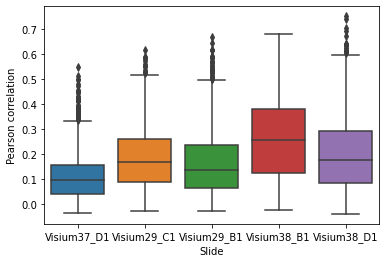

In [15]:
sns.boxplot(x="Slide", y="Pearson correlation", data=df)

In [16]:
top_300gene = df.groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:300].index
for i in top_300gene:
    print(i)

HSPB1
B2M
PFN1
CALML5
CD74
CD44
S100A10
ANXA2
IFI27
CD63
APOE
ILF3
FLNA
CSTA
RHOA
S100B
MYH9
MYC
CTNNB1
CTSD
KLF4
CD81
LGALS1
MIF
CTSB
HLA-DRA
HMGB1
HLA-E
SNCA
PLA2G4F
HMGA1
TNC
EIF4A2
RXRA
ZFP36L1
S100A8
CD99
TAPBP
GNAS
RBX1
ZFP36L2
BCL2L2
HLA-DMA
S100A9
FGFR3
IQGAP1
RAC1
PRAME
DDX3X
CEBPA
HLA-DPB1
SDC1
HLA-DPA1
CDH1
ERBB3
ITGB1
PPP2CB
S100A7
CTNND1
SPINK5
CCL19
EMP3
CDK4
ANXA5
MCL1
MAP2K2
GTF2I
SOX10
MDM4
EPHB6
TAP1
PTPRC
SERPINB2
IFITM2
IFI16
LAMP1
IL20RB
RORA
IKBKB
AFDN
PTEN
MACF1
LGALS3
HRAS
IRF4
GATA3
GNAI2
C1R
STAT6
TOLLIP
PSMD2
NFE2L2
MARCKSL1
FN1
MAF
HLA-F
KLF5
CXCL14
ARG1
TFDP1
IL32
STAT1
MAX
ETS1
MGAT1
BRD4
MFGE8
DHX15
TYK2
PPP2R2C
SBNO2
AKT2
PAX3
FOS
STAT2
GTF3C1
FOXO3
TRBC2
ANAPC5
CD9
PSMB7
CBLC
TNFRSF14
COL3A1
CAST
PYCARD
TXNIP
PSMB8
WIPI1
TGFBI
ERCC1
ETV5
SDHA
ACTN4
TIMP1
COL1A2
BCL2L1
BST2
GPI
STK11
MAPK14
ZNF750
RHOB
AKT1
HDAC5
CD37
ITGB4
ITGA3
IKZF1
CAPN2
COL27A1
C1QB
CD164
CTSH
STAT3
PDIA6
TBL1XR1
ERBB2
HPGD
PIK3CD
CLIP1
YTHDF2
DEFB1
RELA
CDK12
TRAC
TAP2
CDKN1A
IGF1R

In [17]:
# save pickle
with open(DATA_PATH / "top_300gene.pickle", "wb") as f:
    pickle.dump(top_300gene, f)

In [18]:
top_100gene = df.groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:100].index
df_top100 = df[df["Gene"].isin(top_100gene)]

In [19]:
# save pickle
with open(DATA_PATH / "top_100gene.pickle", "wb") as f:
    pickle.dump(top_100gene, f)

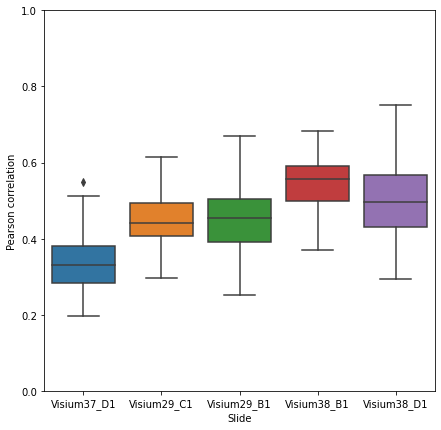

In [20]:
ax, fig = plt.subplots(figsize=(7,7))
sns.boxplot(x="Slide", y="Pearson correlation", data=df_top100)
plt.ylim(0,1)
# save pdf figure
plt.savefig(OUT_PATH / "top_100gene.pdf")
# plt.show()

In [10]:
# imgrow
(8373 - 8271)*0.20635575 / 100 * 55 / 2

5.7882787874999995

In [11]:
# col
(1211 - 1035)*0.20635575 / 100 * 55 / 2

9.9876183